# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "RF"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'RF',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_RF'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.454  1  0.748 0.388 0.004   
                             age        0.008  1  0.013 0.910 0.000   
                             Kiel       1.785  1  2.942 0.088 0.015   
                             Magdeburg  5.442  1  8.970 0.003 0.045   
                             Sweden     8.894  1 14.659 0.000 0.071   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.113  1  0.121 0.729 0.001   
                             age        0.749  1  0.799 0.373 0.004   
                             Kiel       0.062  1  0.066 0.797 0.000   
                             Magdeburg  2.923  1  3.115 0.079 0.016   
                             Sweden    11.145  1 11.879 0.001 0.059   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.411  0.549    False  
                             age               0.041  0.949    False  
                             Kiel              1.056  0.188    False  
                             Magdeburg         2.508  0.013     True  
                             Sweden            3.758  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.137  0.827    False  
                             age               0.429  0.534    False  
                             Kiel              0.099  0.876    False  
                             Magdeburg         1.102  0.174    False  
                             Sweden            3.156  0.004     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                      RF                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.921  1  6.876 0.009 0.035   
                             age        0.002  1  0.015 0.902 0.000   
                             Kiel       0.205  1  1.532 0.217 0.008   
                             Magdeburg  0.420  1  3.135 0.078 0.016   
                             Sweden     1.567  1 11.696 0.001 0.058   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.435  1  3.036 0.083 0.016   
                             age        0.934  1  1.976 0.161 0.010   
                             Kiel       2.106  1  4.455 0.036 0.023   
                             Magdeburg  1.874  1  3.964 0.048 0.020   
                             Sweden    13.169  1 27.858 0.000 0.127   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.025  0.027     True  
                             age               0.045  0.940    False  
                             Kiel              0.663  0.343    False  
                             Magdeburg         1.107  0.154    False  
                             Sweden            3.116  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.081  0.161    False  
                             age               0.792  0.272    False  
                             Kiel              1.443  0.082    False  
                             Magdeburg         1.320  0.103    False  
                             Sweden            6.453  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.388         0.411  0.549    False   
                             Kiel      0.088         1.056  0.188    False   
                             Magdeburg 0.003         2.508  0.013     True   
                             Sweden    0.000         3.758  0.001     True   
                             age       0.910         0.041  0.949    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.729         0.137  0.827    False   
                             Kiel      0.797         0.099  0.876    False   
                             Magdeburg 0.079         1.102  0.174    False   
                             Sweden    0.001         3.156  0.004     True   
                             age       0.373         0.429  0.534    False   

model                                     RF                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.009         2.025  0.027     True  
                             Kiel      0.217         0.663  0.343    False  
                             Magdeburg 0.078         1.107  0.154    False  
                             Sweden    0.001         3.116  0.003     True  
                             age       0.902         0.045  0.940    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.083         1.081  0.161    False  
                             Kiel      0.036         1.443  0.082    False  
                             Magdeburg 0.048         1.320  0.103    False  
                             Sweden    0.000         6.453  0.000     True  
                             age       0.161         0.792  0.272    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'RF': 'RF'}

## Describe scores

In [10]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.260         2.490     0.336     0.233         3.090     0.291
std       0.303         5.341     0.330     0.296         5.810     0.323
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.004         0.336     0.014     0.001         0.390     0.003
50%       0.121         0.916     0.242     0.072         1.140     0.145
75%       0.461         2.443     0.614     0.407         3.086     0.543
max       0.999       143.055     0.999     1.000        84.331     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_50883/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.388         0.411   
A0A024R0T9;K7ER74;P02655                           AD     0.050         1.303   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.044         1.354   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.567         0.246   
A0A075B6H7                                         AD     0.169         0.773   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.041         1.387   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.443         0.353   
S4R3U6                                             AD     0.729         0.137   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.549    False   
A0A024R0T9;K7ER74;P02655                           AD      0.121    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.111    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.705    False   
A0A075B6H7                                         AD      0.306    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.104    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.601    False   
S4R3U6                                             AD      0.827    False   

model                                                        RF                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.009         2.025   
A0A024R0T9;K7ER74;P02655                           AD     0.034         1.463   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.381         0.419   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.253         0.596   
A0A075B6H7                                         AD     0.031         1.511   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.270         0.568   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.383         0.417   
S4R3U6                                             AD     0.083         1.081   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.027     True  
A0A024R0T9;K7ER74;P02655                           AD      0.079    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.520    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.386    False  
A0A075B6H7                                         AD      0.072    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                                RF                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.255         1.409     0.337     0.245         1.515     0.311
std       0.293         1.655     0.318     0.292         1.764     0.315
min       0.000         0.002     0.000     0.000         0.001     0.000
25%       0.012         0.360     0.038     0.009         0.366     0.026
50%       0.129         0.889     0.254     0.104         0.985     0.193
75%       0.437         1.934     0.594     0.431         2.030     0.565
max       0.995        24.266     0.997     0.999        19.928     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,RF
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1026,970


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.388         0.411  0.549   
A0A024R0T9;K7ER74;P02655                           0.050         1.303  0.121   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.044         1.354  0.111   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.567         0.246  0.705   
A0A075B6H7                                         0.169         0.773  0.306   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.041         1.387  0.104   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.443         0.353  0.601   
S4R3U6                                             0.729         0.137  0.827   

                                                               RF  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.009   
A0A024R0T9;K7ER74;P02655                              False 0.034   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.381   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.253   
A0A075B6H7                                            False 0.031   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.270   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.383   
S4R3U6                                                False 0.083   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.025  0.027   
A0A024R0T9;K7ER74;P02655                                   1.463  0.079   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.419  0.520   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.596  0.386   
A0A075B6H7                                                 1.511  0.072   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.291   
Q9Y6X5                                                     0.568  0.404   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.161   
Q9Y6Y9                                                     0.417  0.521   
S4R3U6                                                     1.081  0.161   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - RF (no)    901
PI (yes) - RF (yes)   326
PI (no)  - RF (yes)   125
PI (yes) - RF (no)     69
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_50883/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


PI                       \
                                                 p-unc -Log10 pvalue qvalue   
protein groups                                                                
A0A024QZX5;A0A087X1N8;P35237                     0.388         0.411  0.549   
A0A075B6R2                                       0.410         0.388  0.569   
A0A075B6S5                                       0.136         0.866  0.263   
A0A075B7B8                                       0.217         0.664  0.367   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2 0.992         0.004  0.995   
...                                                ...           ...    ...   
Q9UKB5                                           0.003         2.576  0.011   
Q9ULP0-3;Q9ULP0-6                                0.019         1.720  0.057   
Q9UNW1                                           0.009         2.033  0.032   
Q9UP79                                           0.196         0.707  0.341   
Q9UQ52                                           0.148         0.829  0.280   

                                                             RF                \
                                                 rejected p-unc -Log10 pvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                        False 0.009         2.025   
A0A075B6R2                                          False 0.003         2.560   
A0A075B6S5                                          False 0.017         1.780   
A0A075B7B8                                          False 0.000         4.232   
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2    False 0.000         4.158   
...                                                   ...   ...           ...   
Q9UKB5                                               True 0.269         0.570   
Q9ULP0-3;Q9ULP0-6                                   False 0.001         2.986   
Q9UNW1                                               True 0.765         0.116   
Q9UP79                                              False 0.000         3.532   
Q9UQ52                                              False 0.001         3.210   

                                                                      data  
                                                 qvalue rejected frequency  
protein groups                                                              
A0A024QZX5;A0A087X1N8;P35237                      0.027     True       186  
A0A075B6R2                                        0.009     True       164  
A0A075B6S5                                        0.043     True       129  
A0A075B7B8                                        0.000     True        57  
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2  0.000     True       134  
...                                                 ...      ...       ...  
Q9UKB5                                            0.403    False       148  
Q9ULP0-3;Q9ULP0-6                                 0.004     True       136  
Q9UNW1                                            0.843    False       171  
Q9UP79                                            0.001     True       135  
Q9UQ52                                            0.003     True       188  

[194 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,RF,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.549,0.027,186,PI (no) - RF (yes)
A0A024R0T9;K7ER74;P02655,0.121,0.079,195,PI (no) - RF (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.111,0.520,174,PI (no) - RF (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.705,0.386,196,PI (no) - RF (no)
A0A075B6H7,0.306,0.072,91,PI (no) - RF (no)
...,...,...,...,...
Q9Y6R7,0.315,0.291,197,PI (no) - RF (no)
Q9Y6X5,0.104,0.404,173,PI (no) - RF (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.161,197,PI (no) - RF (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,RF,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.995,0.000,134,PI (no) - RF (yes),0.994
Q96PQ0,0.007,0.999,177,PI (yes) - RF (no),0.992
F6VDH7;P50502;Q3KNR6,0.004,0.968,175,PI (yes) - RF (no),0.964
O00187;O00187-2,0.971,0.017,119,PI (no) - RF (yes),0.954
P48745,0.934,0.006,180,PI (no) - RF (yes),0.928
...,...,...,...,...,...
Q9P2E7;Q9P2E7-2,0.043,0.051,196,PI (yes) - RF (no),0.008
Q9NX62,0.055,0.047,197,PI (no) - RF (yes),0.008
P00740;P00740-2,0.053,0.045,197,PI (no) - RF (yes),0.008


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_1_RF


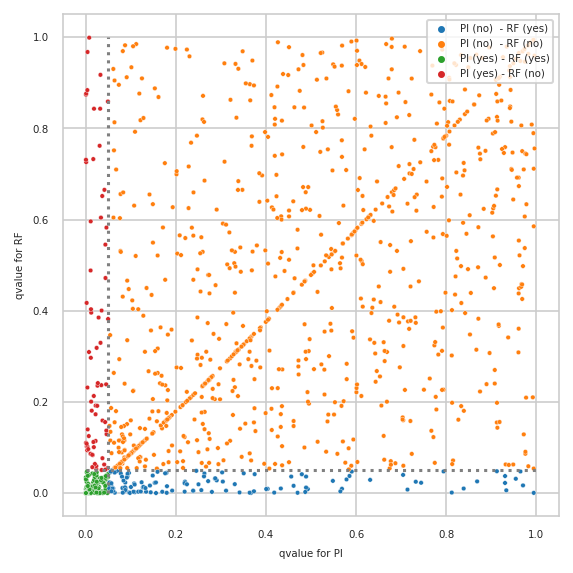

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_RF/diff_analysis_comparision_2_RF


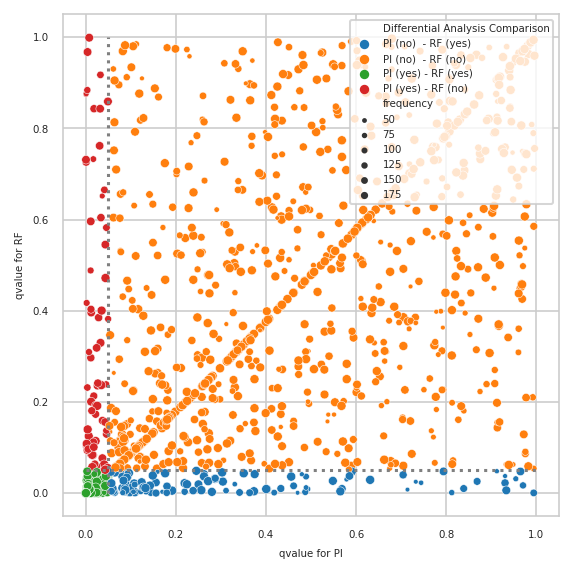

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
APOE,ENSP00000252486,4.882
MAPT,ENSP00000340820,4.800
PSEN1,ENSP00000326366,4.800
APP,ENSP00000284981,4.800
SNCA,ENSP00000500990,4.772
...,...,...
HECTD1,ENSP00000382269,0.681
ETNK1,ENSP00000500633,0.681
CAPN11,ENSP00000381758,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/9315d83d47168fa3da1739d7e683ad72_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out